# <font>2.Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location</font>

In [3]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
url = 'https://api.openweathermap.org/data/2.5/forecast?lat=19.9833&lon=73.8&appid=68bc7250e17f5adfb33101cf8e33169b&city_name=Nashik' # <-- This is app id also known as api key, which you have to generate your own, and paste it here

#vurl ='https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=307d11bca480dd730d99187c926&city_name=London'
response = requests.get(url)
data = response.json()
pretty_json = json.dumps(data,indent=4)
print(pretty_json)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1730721600,
            "main": {
                "temp": 300.45,
                "feels_like": 300.66,
                "temp_min": 300.45,
                "temp_max": 300.45,
                "pressure": 1011,
                "sea_level": 1011,
                "grnd_level": 947,
                "humidity": 47,
                "temp_kf": 0
            },
            "weather": [
                {
                    "id": 800,
                    "main": "Clear",
                    "description": "clear sky",
                    "icon": "01d"
                }
            ],
            "clouds": {
                "all": 8
            },
            "wind": {
                "speed": 1.53,
                "deg": 63,
                "gust": 1.57
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "d"
            },
            "dt_t

In [20]:
date_time = data['list'][0]['dt_txt']
date_time

'2024-11-04 12:00:00'

# 3.Extract relevant weather attributes such as temperature, humidity, wind speed, and  precipitation from the API response

In [21]:
data_struct = []
for record in data['list']:
    temp = record['main']['temp']
    humid = record['main']['humidity']
    wind_speed = record['wind']['speed']
    desp =record['weather'][0]['description']
    date_time = record['dt_txt']
    data_struct.append({'Temperature':temp,'Humidity':humid,'Wind Speed':wind_speed,'Weather Description':desp,'Date Time':date_time})

data_df = pd.DataFrame(data_struct)
data_df[['Date','Time']] = data_df['Date Time'].str.split(' ',expand=True)
data_df.head()


,Temperature,Humidity,Wind Speed,Weather Description,Date Time,Date,Time
0,300.45,47,1.53,clear sky,2024-11-04 12:00:00,2024-11-04,12:00:00
1,299.43,48,1.22,clear sky,2024-11-04 15:00:00,2024-11-04,15:00:00
2,297.33,52,0.77,clear sky,2024-11-04 18:00:00,2024-11-04,18:00:00
3,294.69,57,0.35,clear sky,2024-11-04 21:00:00,2024-11-04,21:00:00
4,293.75,60,0.41,clear sky,2024-11-05 00:00:00,2024-11-05,00:00:00


In [22]:
data_df.shape

(40, 7)

# 4.Clean and preprocess the retrieved data, handling missing values or inconsistent  formats.

In [23]:
data_df.isnull().sum()

Temperature            0
Humidity               0
Wind Speed             0
Weather Description    0
Date Time              0
Date                   0
Time                   0
dtype: int64

In [24]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          40 non-null     float64
 1   Humidity             40 non-null     int64  
 2   Wind Speed           40 non-null     float64
 3   Weather Description  40 non-null     object 
 4   Date Time            40 non-null     object 
 5   Date                 40 non-null     object 
 6   Time                 40 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ KB


# 5.Perform data modeling to analyze weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.

In [25]:
data_df.describe()

,Temperature,Humidity,Wind Speed
count,40.000000,40.000000,40.000000
mean,297.742500,45.575000,1.976250
std,3.702558,9.797665,1.282751
min,292.440000,26.000000,0.350000
25%,294.677500,39.750000,1.105000
50%,296.760000,47.500000,1.580000
75%,300.812500,53.000000,2.737500
max,304.340000,63.000000,5.490000


# <font>6.Visualize the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.</font>

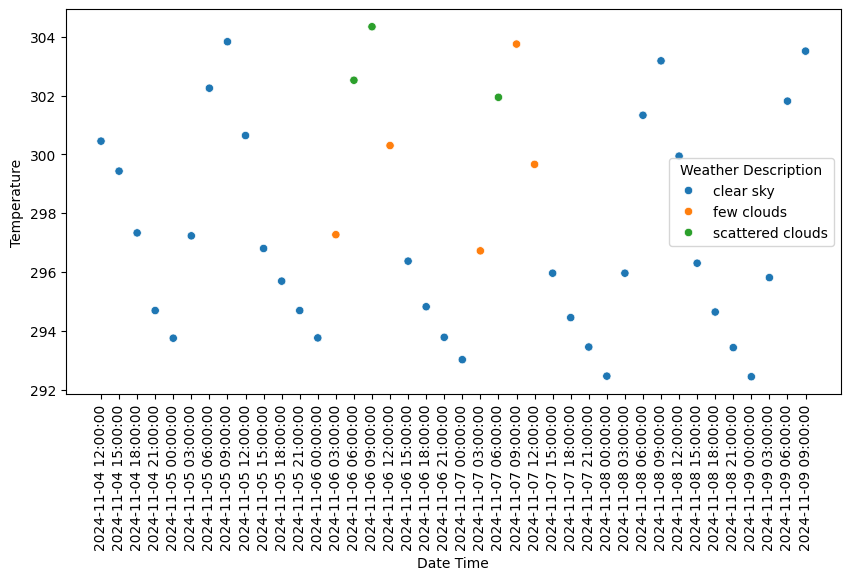

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.scatterplot(x=data_df['Date Time'],
                y=data_df['Temperature'],
                hue=data_df['Weather Description'])

plt.xticks(rotation=90);

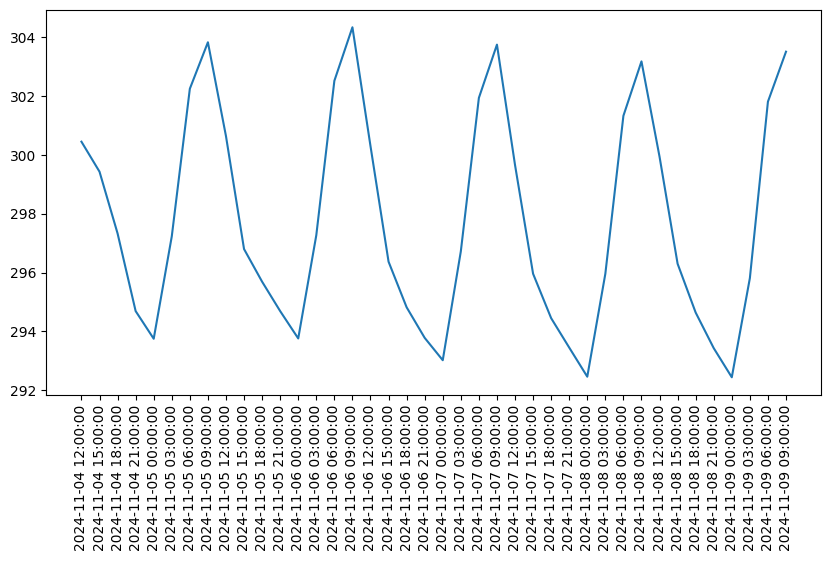

In [27]:

plt.figure(figsize=(10,5))
plt.plot(data_df['Date Time'],data_df['Temperature'])
plt.xticks(rotation=90);

# <font>7.Apply data aggregation techniques to summarize weather statistics by specific time periods</font>                              

In [13]:
data_df.groupby('Date').agg({'Temperature' : 'mean','Wind Speed':'mean'})

,Temperature,Wind Speed
Date,,
2024-11-04,283.38750,1.25500
2024-11-05,281.69375,1.00625
2024-11-06,281.20250,1.01125
2024-11-07,280.51750,1.13875
2024-11-08,280.71625,1.22750
2024-11-09,280.84000,1.28250


In [14]:
data_df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Weather Description',
       'Date Time', 'Date', 'Time'],
      dtype='object')

# <font>9.Explore and visualize relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps.</font>

<Axes: >

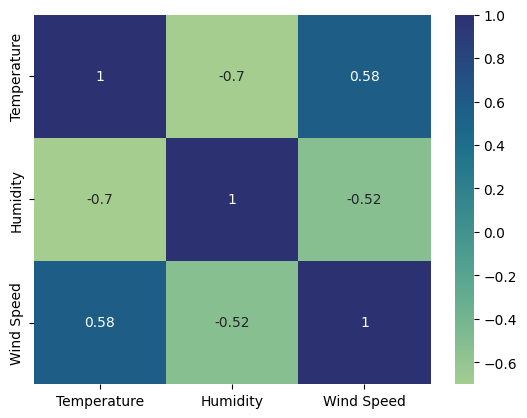

In [17]:
sns.heatmap(data_df[['Temperature','Humidity','Wind Speed']].corr(),annot=True,cmap='crest')